c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python

Specificity is :  0.29245283018867924
Accuracy is :  0.5333333333333333
Sensitivity is :  0.7788461538461539
Precision is :  0.5192307692307693
f1_Score is : 0.6230769230769231


c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python

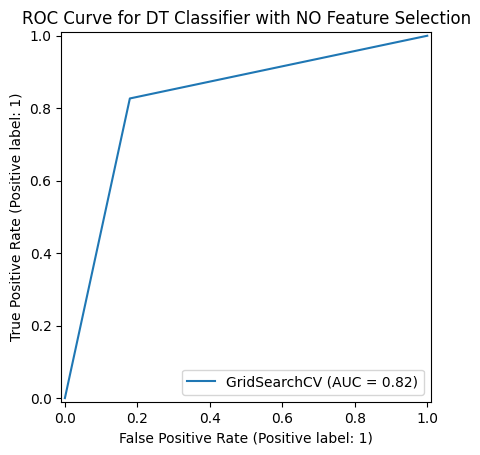

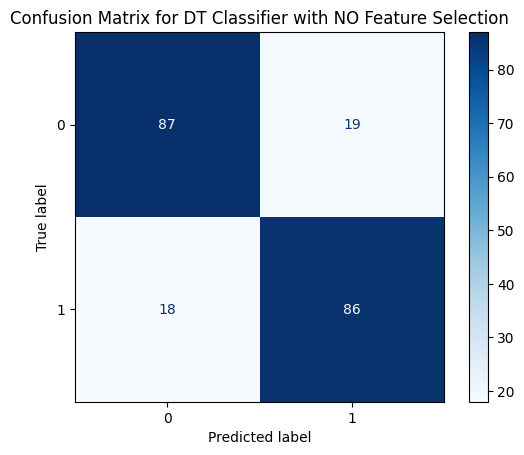

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('final-dataset.csv')
data
X = data.drop(columns=['Signal','Label','Hurst Component'])
y = data['Label']
features = X.columns
features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
from sklearn import preprocessing as pre
X_train = pre.scale(X_train)
x_test = pre.scale(x_test)
x_val = pre.scale(x_val)
X_train.shape
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'), 'max_features':('auto', 'sqrt','log2')}
clf = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)
clf.best_params_
clf.score(x_val, y_val)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
y_true = y_test
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity is : " , specificity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy is : " , accuracy)
sensitivity = tp / (tp + fn)
print("Sensitivity is : " , sensitivity)
precision= (tp/(tp+fp))
print("Precision is : ", precision)
f1_Score = 2 * (precision * sensitivity) / (precision+ sensitivity)
print("f1_Score is :" , f1_Score)

import matplotlib.pyplot as plt  
from sklearn import preprocessing as pre
from sklearn import datasets, metrics, model_selection
from sklearn.metrics import RocCurveDisplay
X = pre.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
clf = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)


RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.title("ROC Curve for DT Classifier with NO Feature Selection")
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the best model from GridSearchCV
best_model = clf.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix for DT Classifier with NO Feature Selection")
plt.show()